<h1>Importing Libraries<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1>Data Exploration<h1>

In [2]:
df= pd.read_excel('Health_Insurance.xlsx')

In [3]:
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [7]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


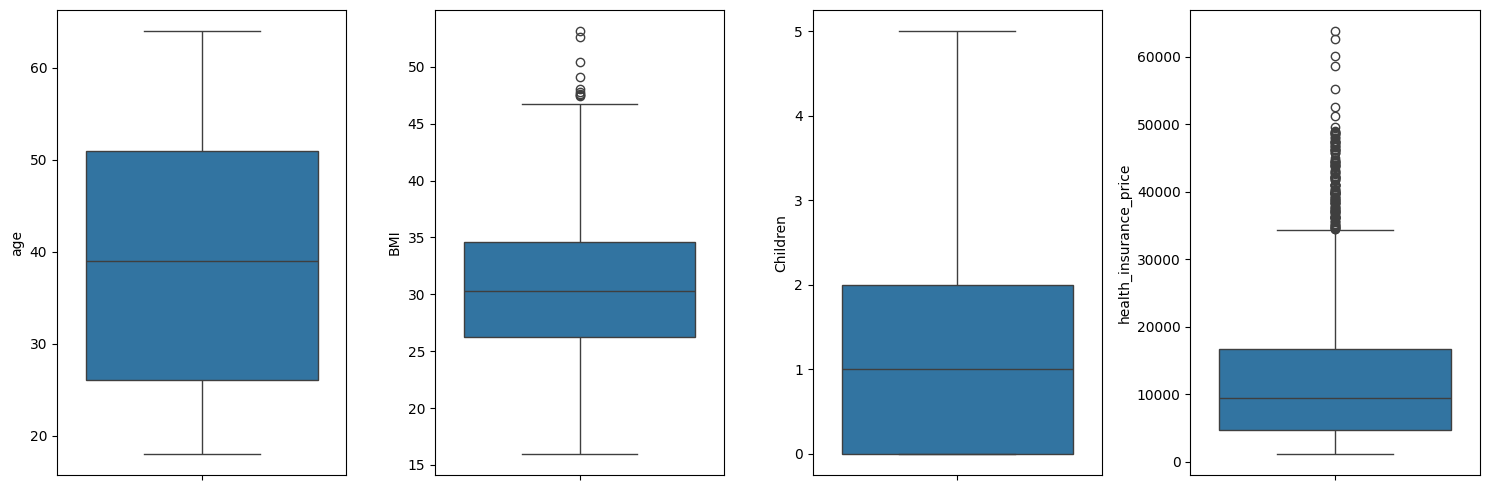

In [10]:
#checking outliers in numerical columns using boxplot
col=df.select_dtypes(include=np.number).columns
fig, axes= plt.subplots(1,len(col), figsize=(15,5))
for i, j in enumerate(axes):
    sns.boxplot(df[col[i]], ax=j)
plt.tight_layout()
plt.show()

<h1>Data Preprocessing<h1>

<h2>Handling Missing Values (Complete Case Analysis Technique)<h3>

In [11]:
#checking percentage of missing values
df.isnull().mean()*100

age                       2.092676
gender                    0.000000
BMI                       1.718984
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149477
dtype: float64

In [12]:
#checking if values are missing at random
df[df.isnull().any(axis=1)]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
26,NaN,female,23.085,0,no,northeast,14451.83515
59,34.0,female,NaN,2,no,northwest,5989.52365
80,NaN,male,26.885,1,no,northeast,4441.21315
107,26.0,male,NaN,2,no,northwest,3877.30425
130,59.0,female,NaN,0,no,northeast,12815.44495
138,NaN,female,31.900,3,no,southeast,27322.73386
159,50.0,female,NaN,3,no,southeast,19749.38338
214,NaN,female,30.900,2,no,southwest,8520.02600
250,18.0,male,NaN,2,yes,northeast,12829.45510


In [13]:
#checking % of data recoverd after dropping null values
len(df.dropna())/len(df)

0.9603886397608371

In [14]:
#dropping null values
new_df= df.dropna()

In [15]:
#checking shape of clean df
new_df.shape

(1285, 7)

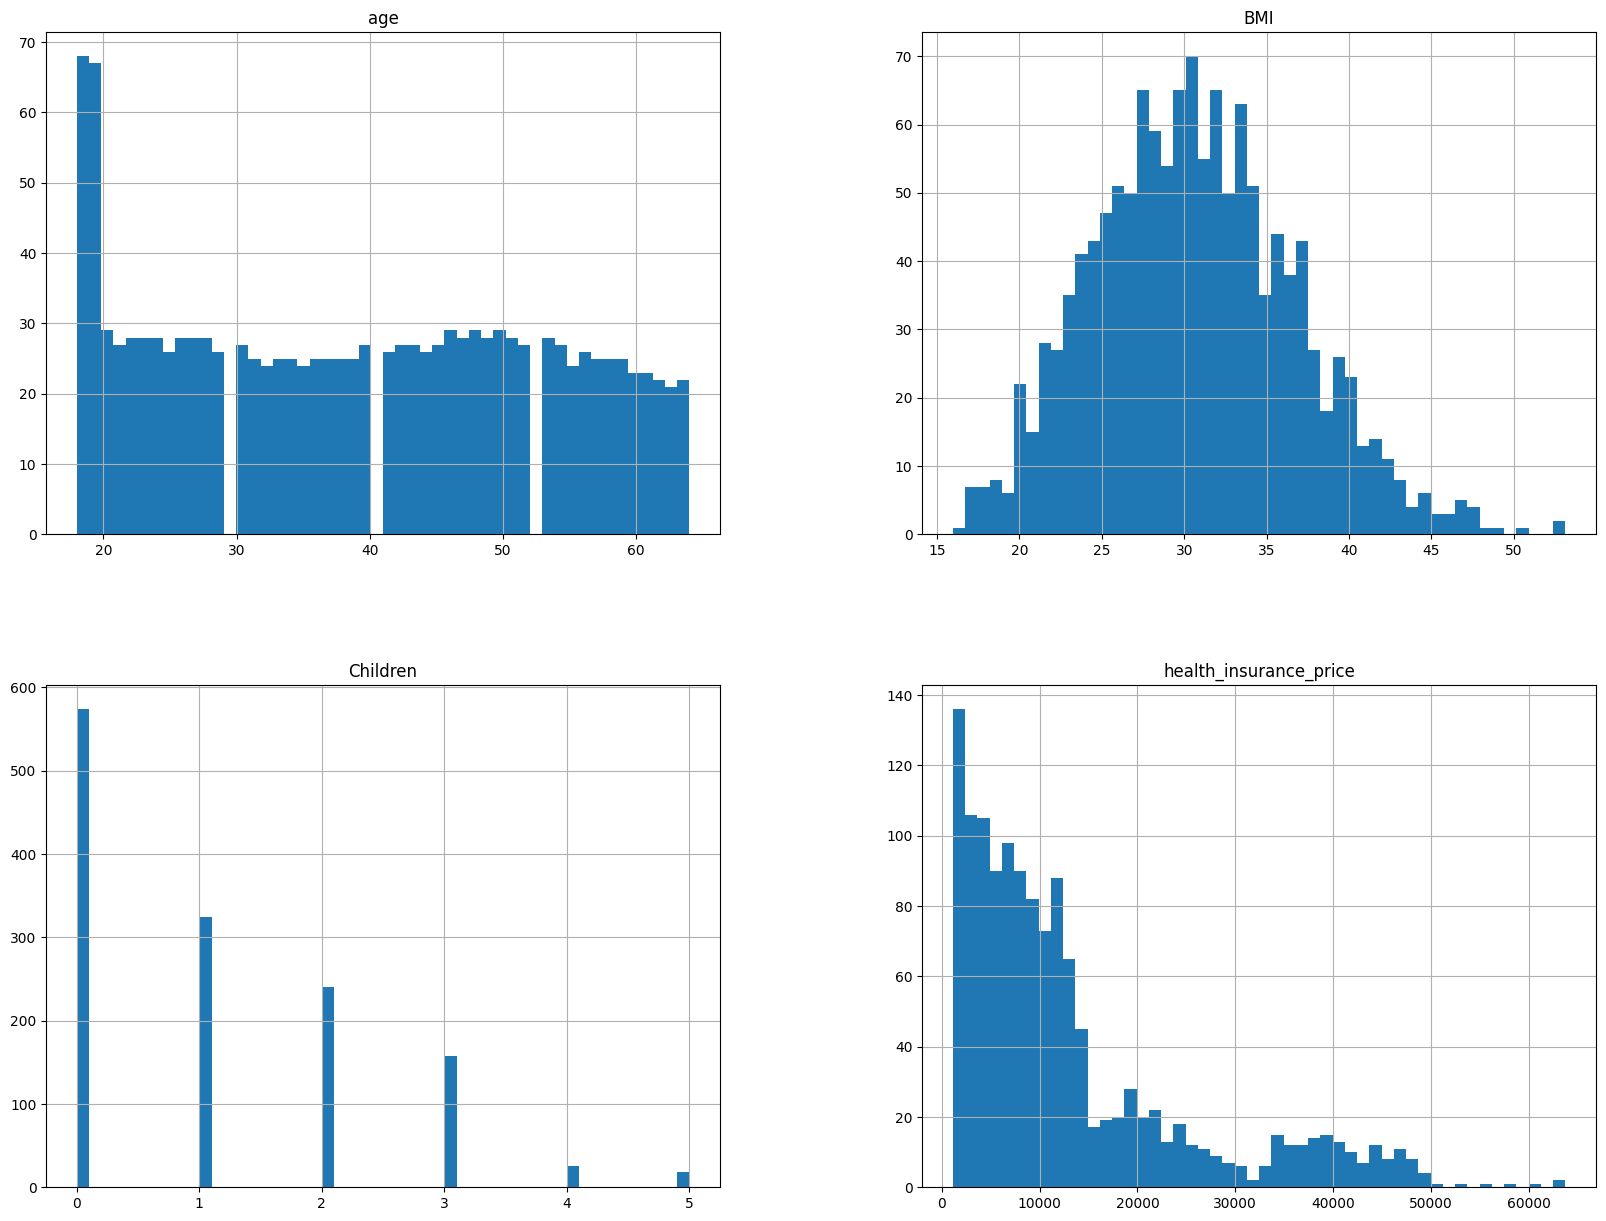

In [16]:
#checking distribution before CCA
df.hist(bins=50, figsize=(20,15))
plt.show()

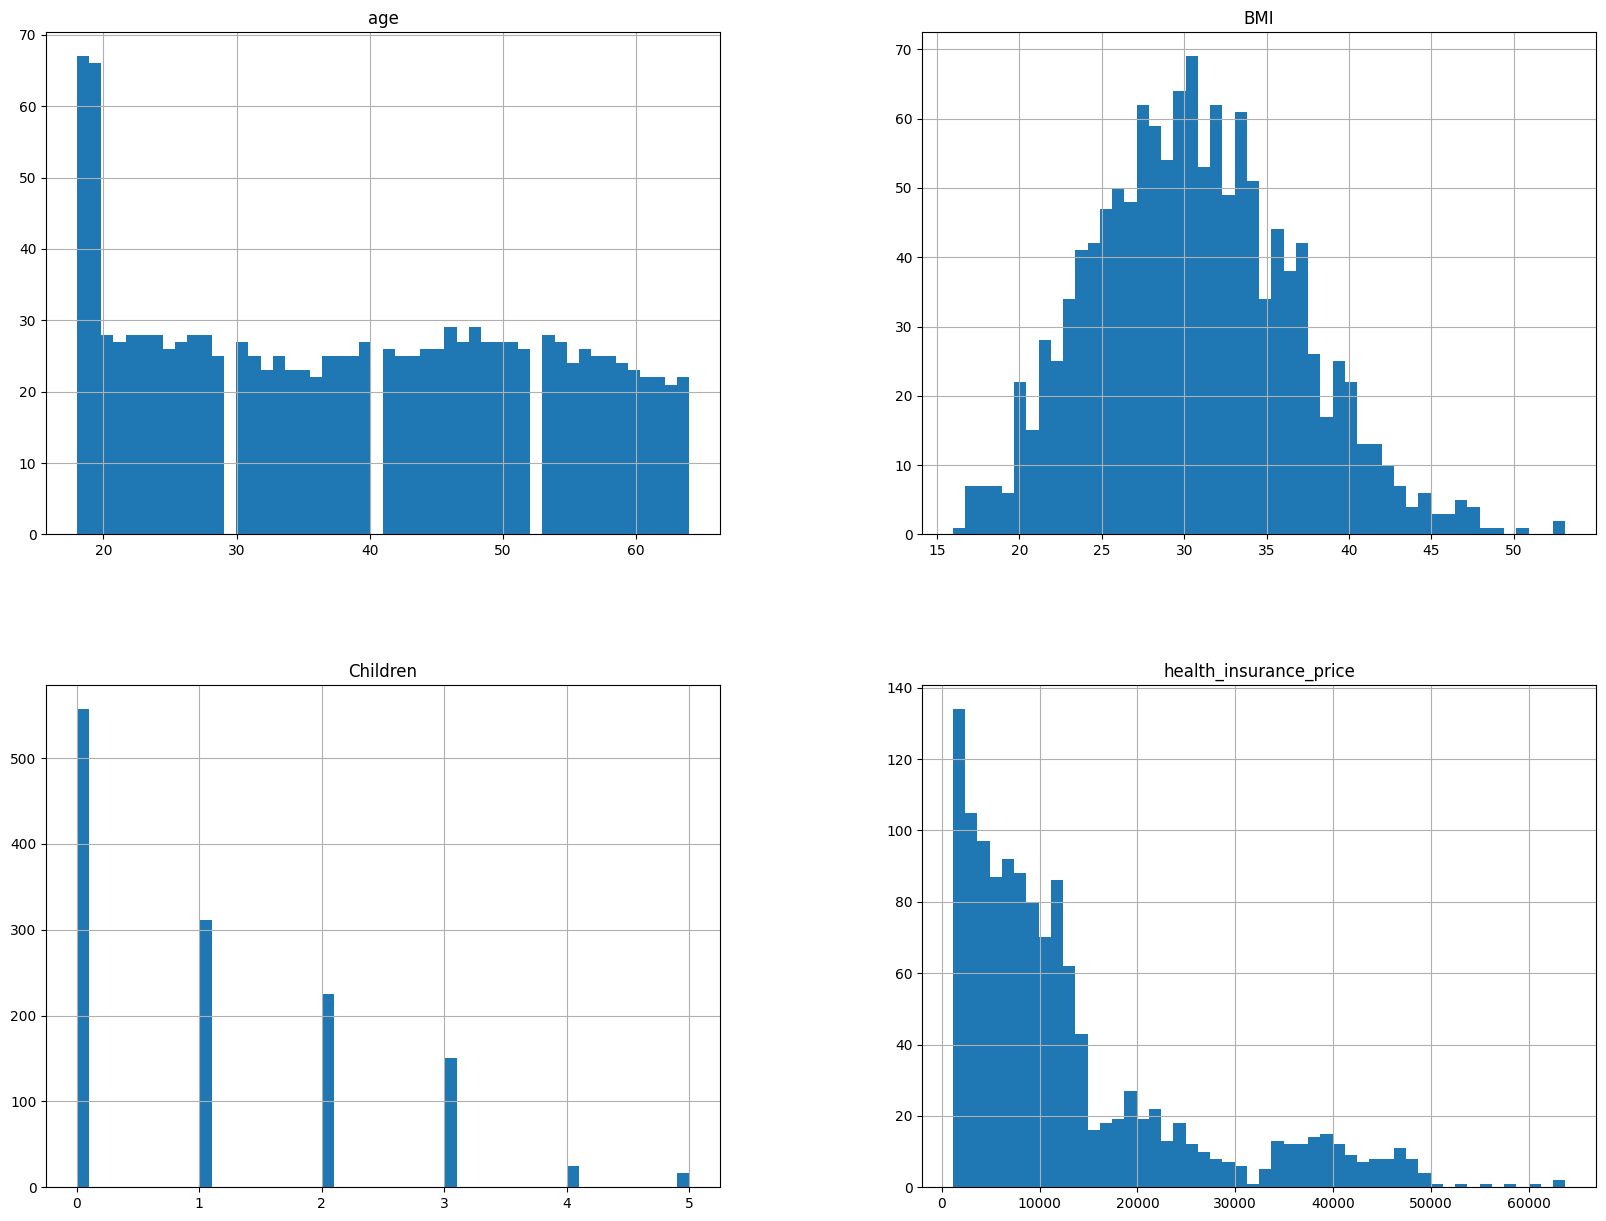

In [17]:
#checking distribution after CCA
new_df.hist(bins=50, figsize=(20,15))
plt.show()

<h2>Handling Outliers (IQR Technique)<h2>

In [18]:
#capping outliers using IQR method
Q1=new_df['BMI'].quantile(0.25)
Q3=new_df['BMI'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

new_df['BMI']=np.where(new_df['BMI']>upper_limit, upper_limit, new_df['BMI'])
new_df['BMI']=np.where(new_df['BMI']<lower_limit, lower_limit, new_df['BMI'])

<h1>Exploratory Data Analysis<h1>

<h2>Univariate Analysis<h2>

Skewnewss: 0.060278699261107606


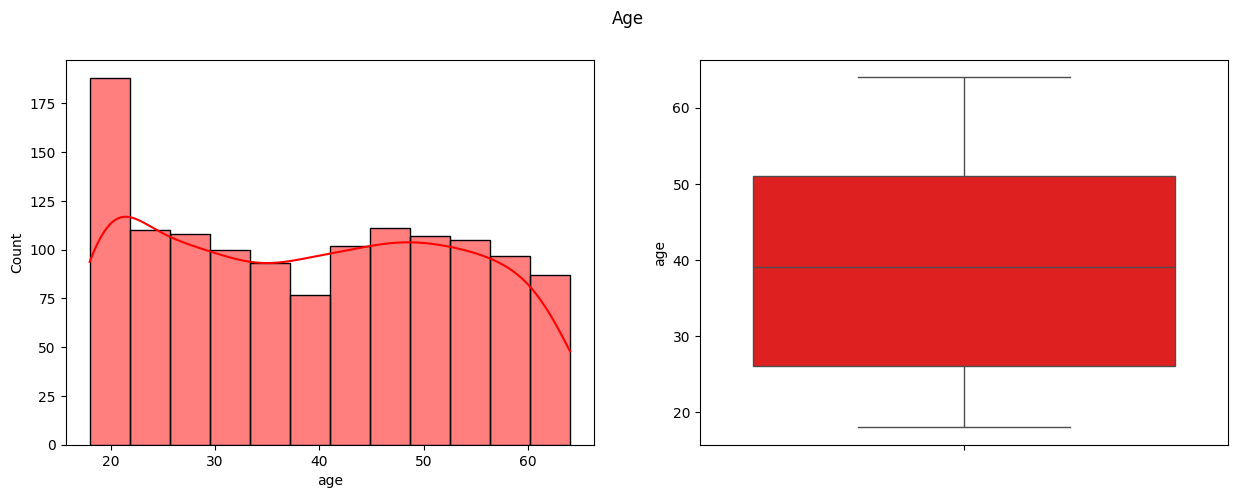

In [19]:
print('Skewnewss:',new_df['age'].skew())

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.histplot(new_df['age'], kde=True, ax=axes[0], color='red')
sns.boxplot(new_df['age'], ax=axes[1], color='red')
plt.suptitle('Age')
plt.show()

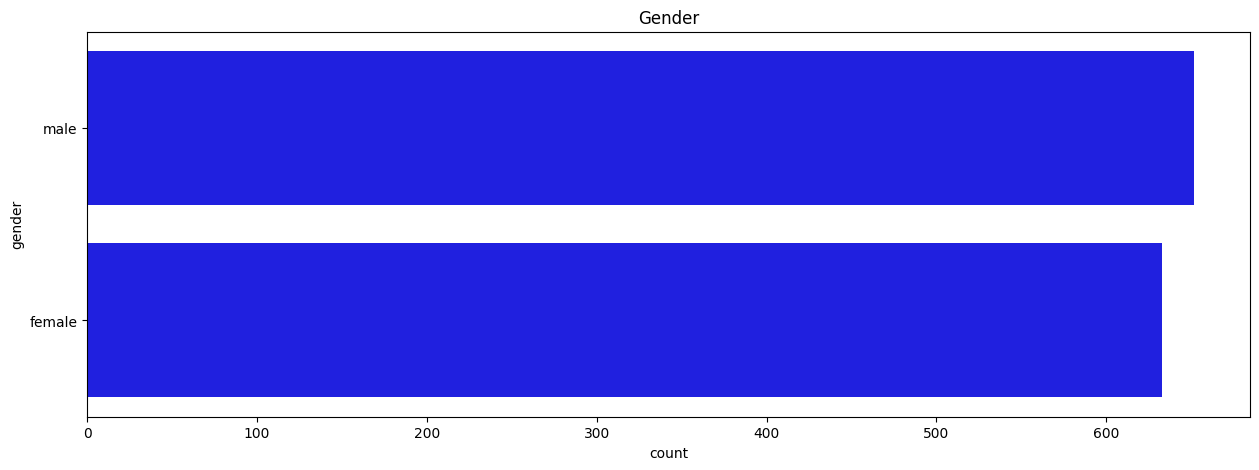

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(new_df['gender'], color='blue')
plt.title('Gender')
plt.show()

Skewness: 0.24535637258294266


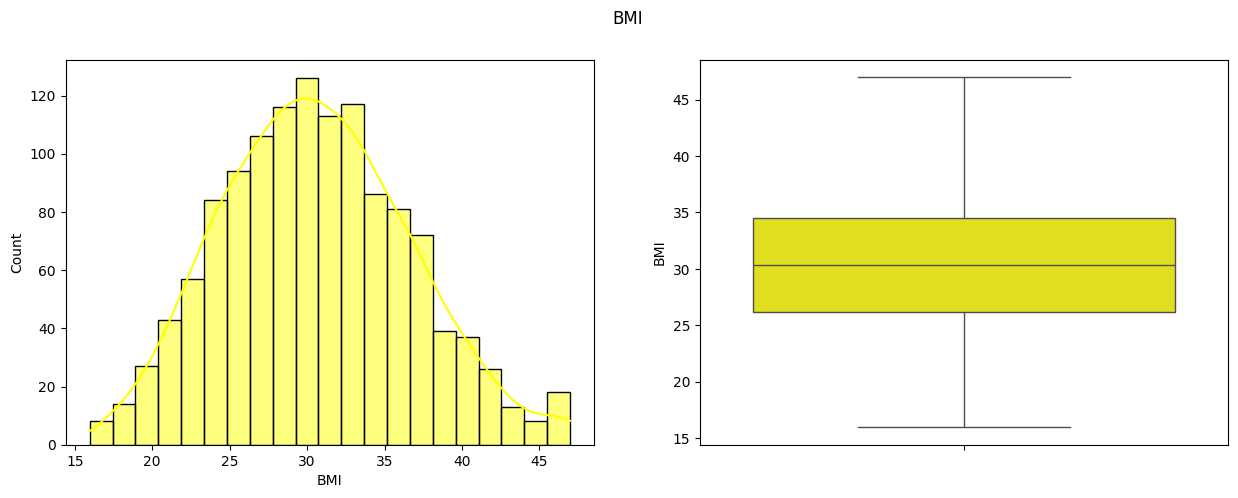

In [21]:
print('Skewness:',new_df['BMI'].skew())

fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.histplot(new_df['BMI'], kde=True, ax=axes[0], color='yellow')
sns.boxplot(new_df['BMI'], ax=axes[1], color='yellow')
plt.suptitle('BMI')
plt.show()

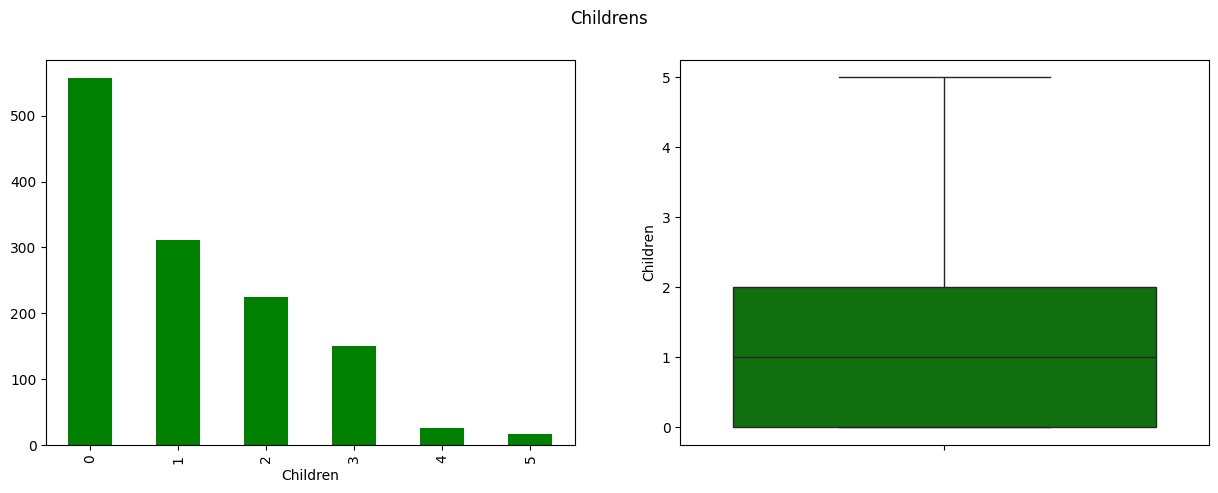

In [22]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
new_df['Children'].value_counts().plot(kind='bar', ax=axes[0], color='green')
sns.boxplot(new_df['Children'], ax=axes[1], color='green')
plt.suptitle('Childrens')
plt.show()

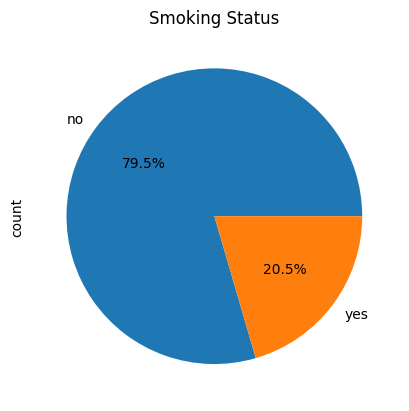

In [25]:
df['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoking Status')
plt.show()

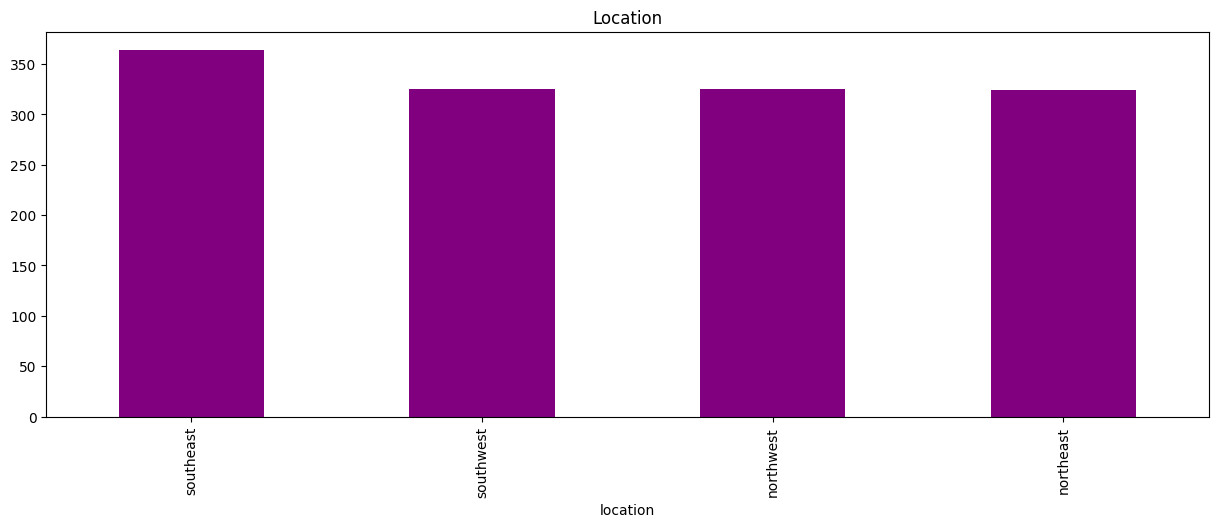

In [26]:
plt.figure(figsize=(15,5))
df['location'].value_counts().plot(kind='bar', color='purple')
plt.title('Location')
plt.show()

<h2>Bivariate Analysis<h2>

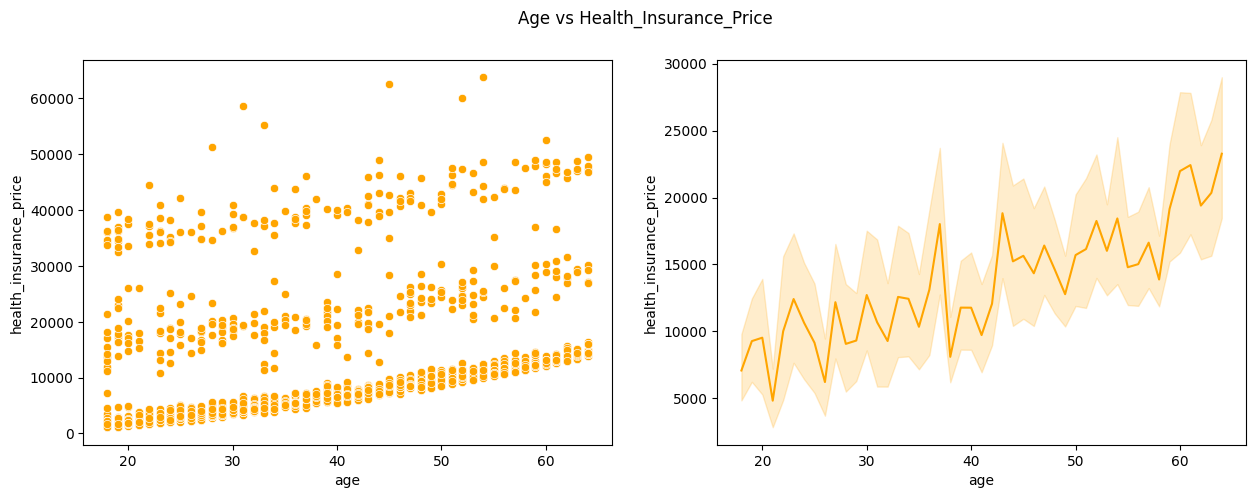

In [27]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x=new_df['age'], y=new_df['health_insurance_price'], ax=axes[0], color='orange')
sns.lineplot(x=new_df['age'], y=new_df['health_insurance_price'], ax=axes[1], color='orange')
plt.suptitle('Age vs Health_Insurance_Price')
plt.show()

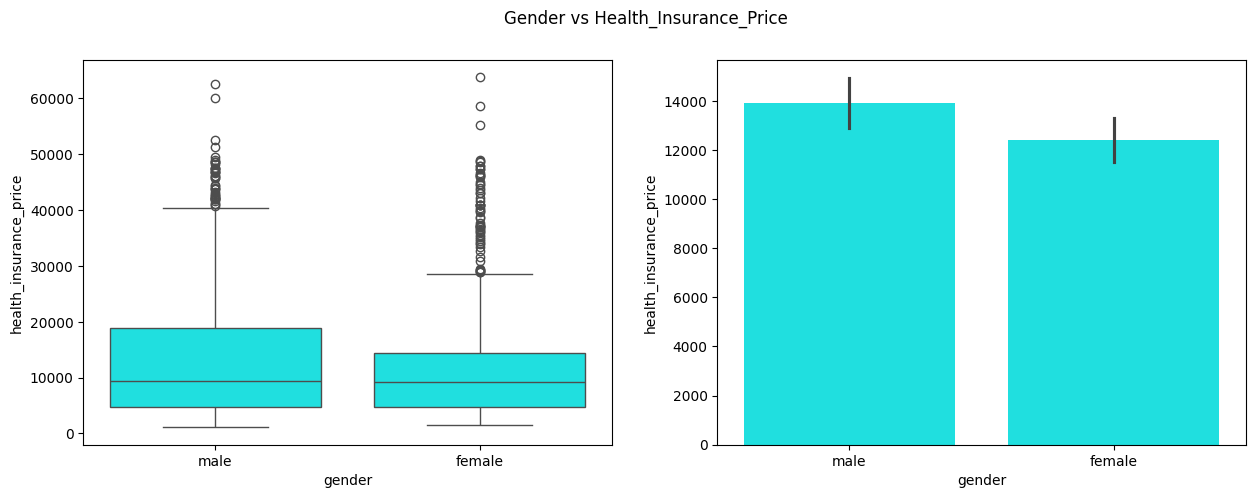

In [28]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=new_df['gender'], y=new_df['health_insurance_price'], ax=axes[0], color='cyan')
sns.barplot(x=new_df['gender'], y=new_df['health_insurance_price'], ax=axes[1], color='cyan')
plt.suptitle('Gender vs Health_Insurance_Price')
plt.show()

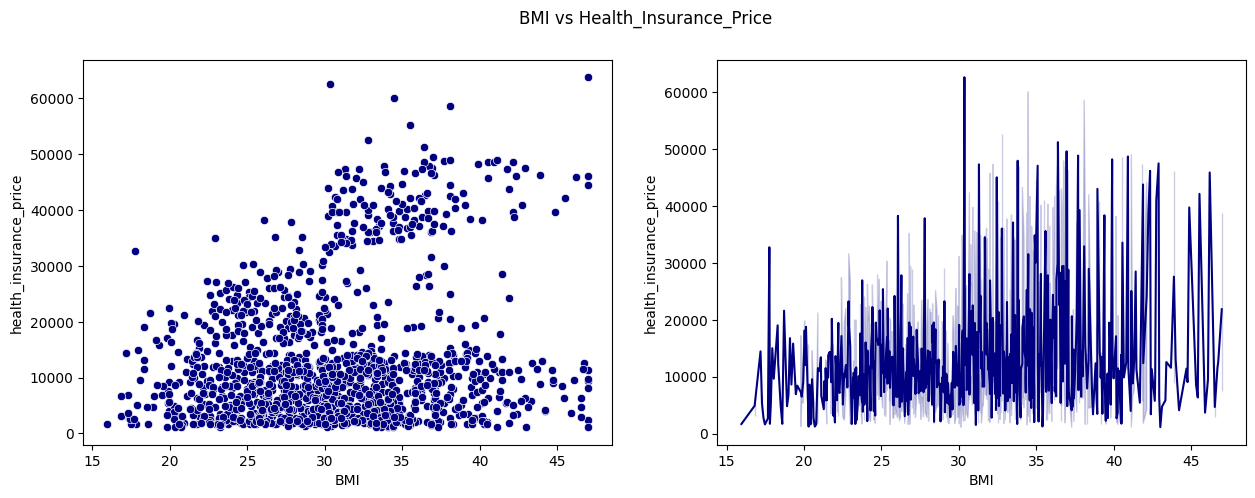

In [29]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x=new_df['BMI'], y=new_df['health_insurance_price'], ax=axes[0], color='navy')
sns.lineplot(x=new_df['BMI'], y=new_df['health_insurance_price'], ax=axes[1], color='navy')
plt.suptitle('BMI vs Health_Insurance_Price')
plt.show()

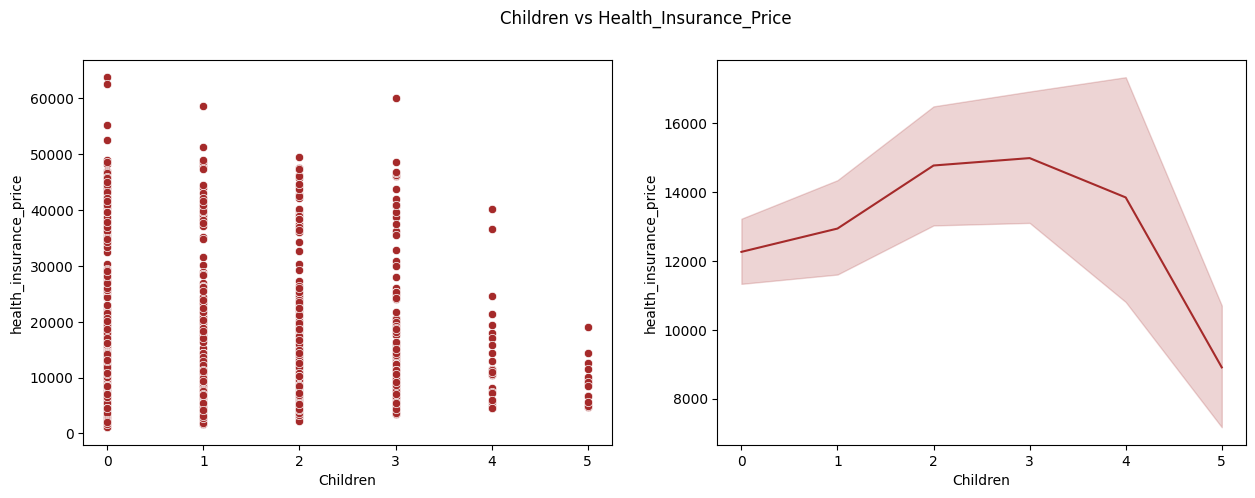

In [30]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(x=new_df['Children'], y=new_df['health_insurance_price'], ax=axes[0], color='brown')
sns.lineplot(x=new_df['Children'], y=new_df['health_insurance_price'], ax=axes[1], color='brown')
plt.suptitle('Children vs Health_Insurance_Price')
plt.show()

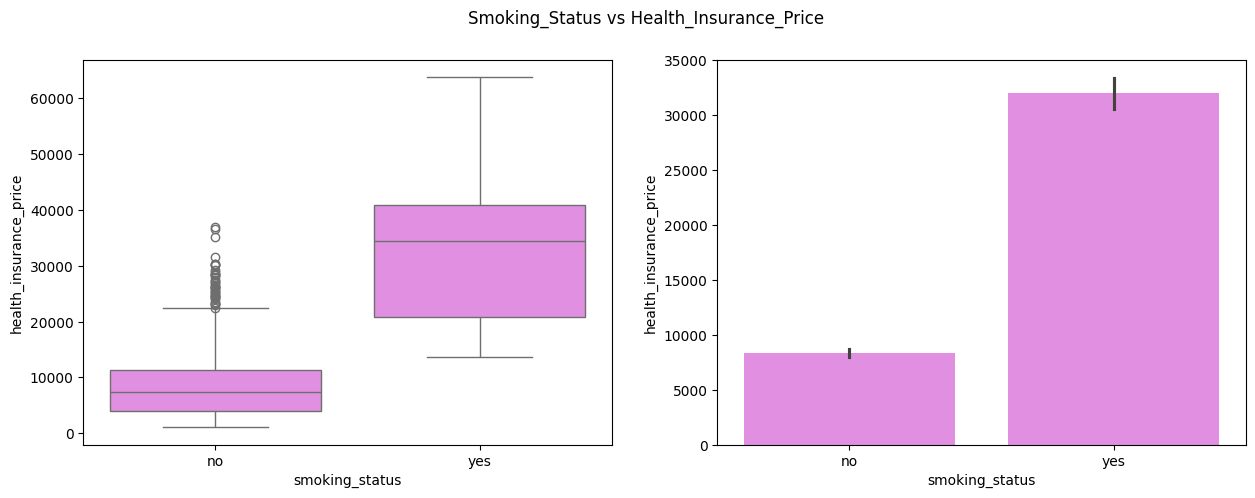

In [31]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=new_df['smoking_status'], y=new_df['health_insurance_price'], ax=axes[0], color='violet')
sns.barplot(x=new_df['smoking_status'], y=new_df['health_insurance_price'], ax=axes[1], color='violet')
plt.suptitle('Smoking_Status vs Health_Insurance_Price')
plt.show()

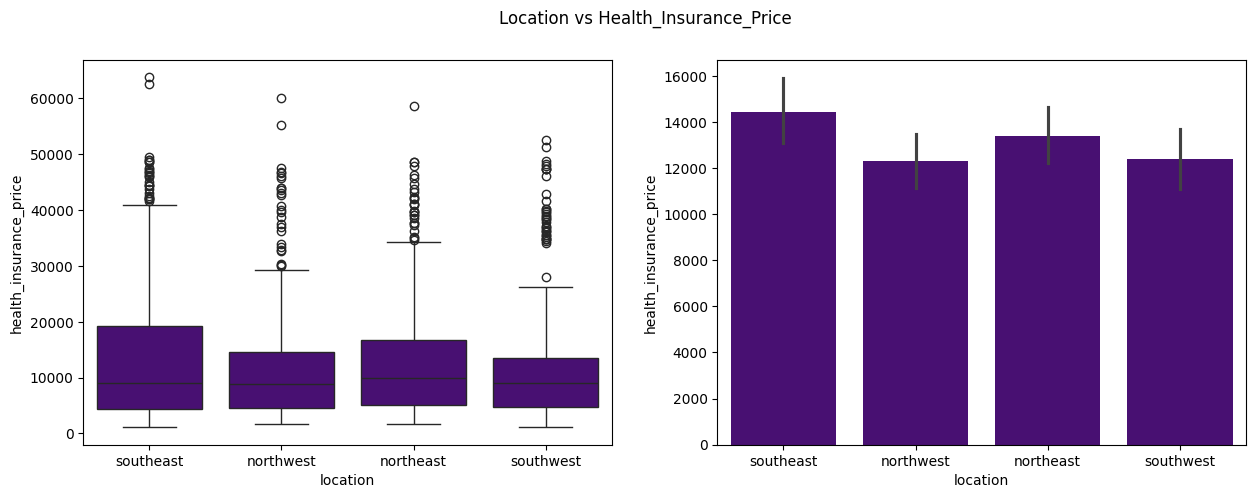

In [32]:
fig, axes= plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=new_df['location'], y=new_df['health_insurance_price'], ax=axes[0], color='indigo')
sns.barplot(x=new_df['location'], y=new_df['health_insurance_price'], ax=axes[1], color='indigo')
plt.suptitle('Location vs Health_Insurance_Price')
plt.show()

<h2>Multivariate Analysis<h2>

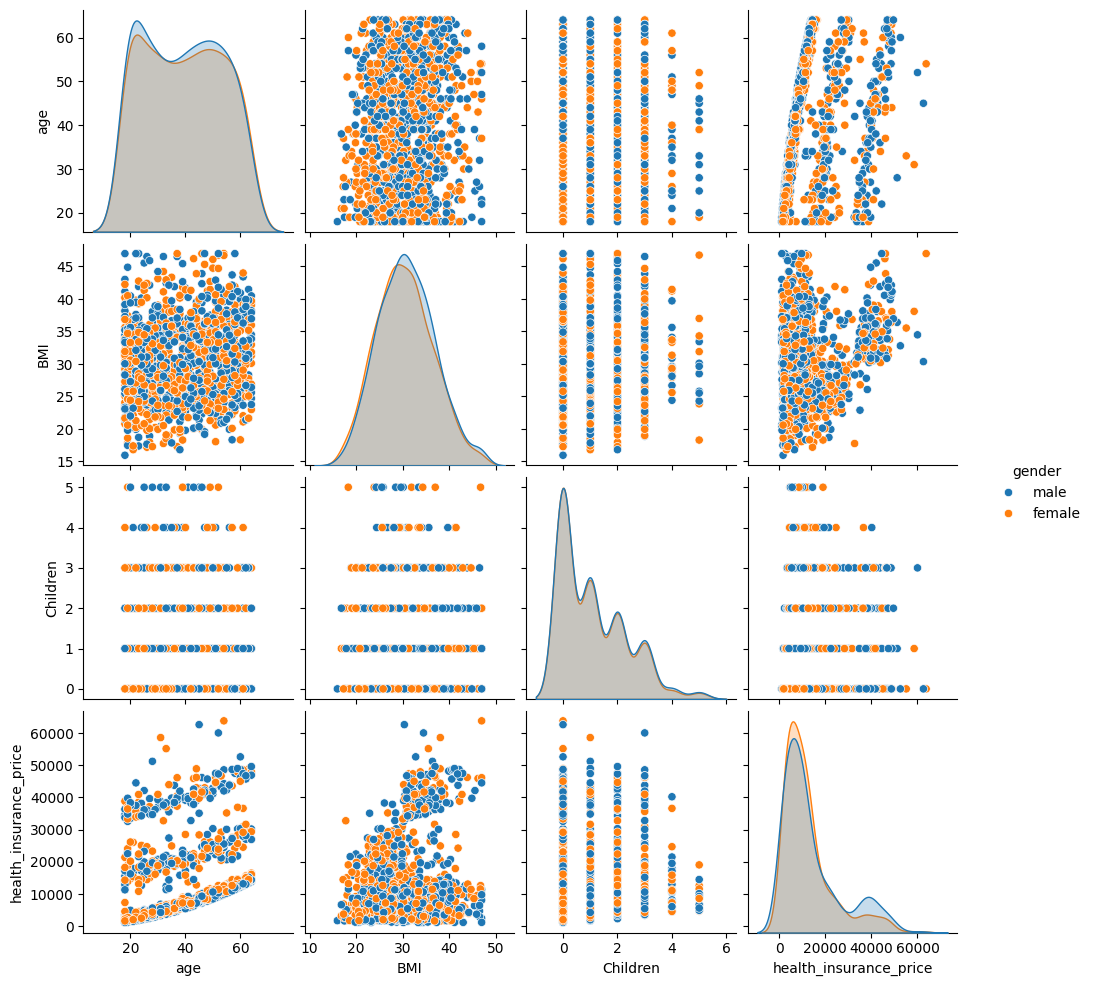

In [ ]:
sns.pairplot(new_df, hue='gender')
plt.show()

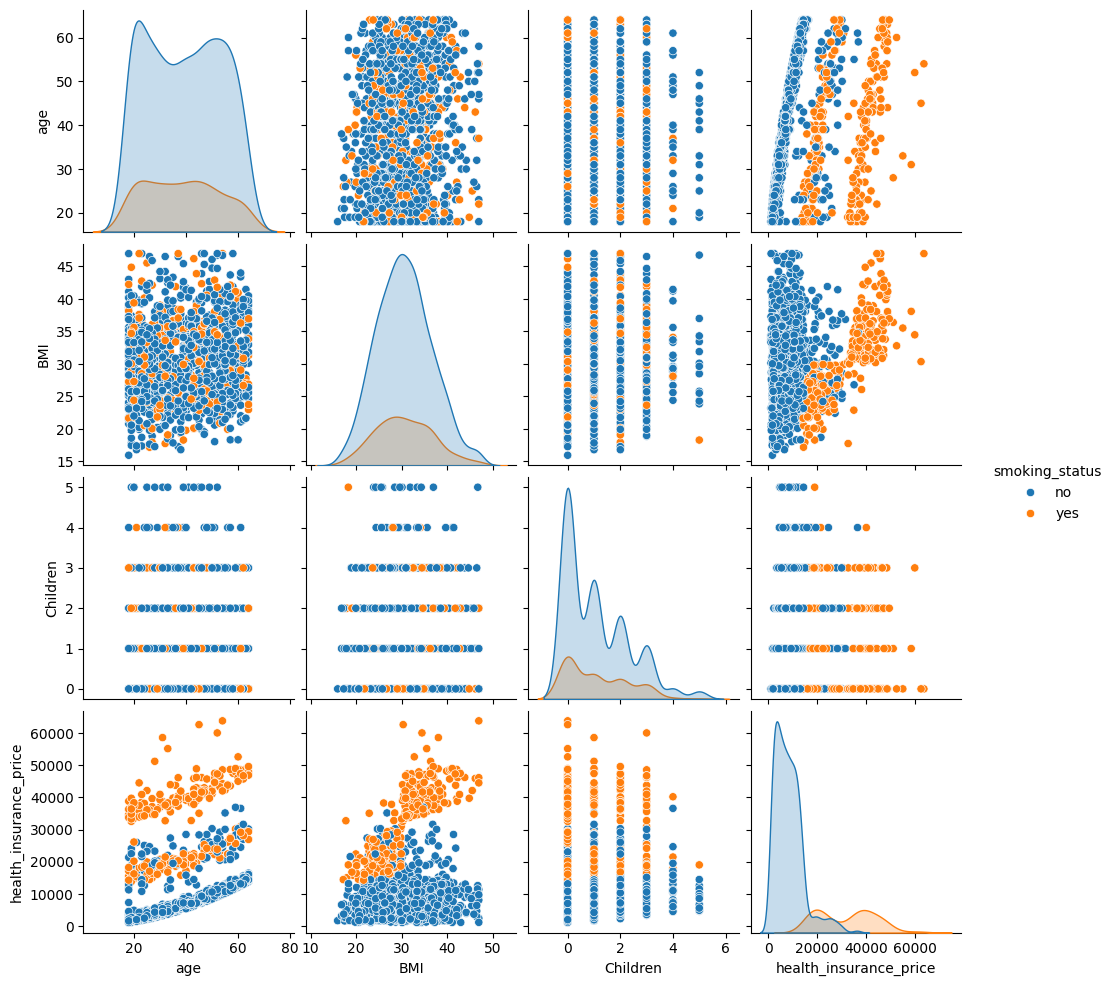

In [ ]:
sns.pairplot(new_df, hue='smoking_status')
plt.show()

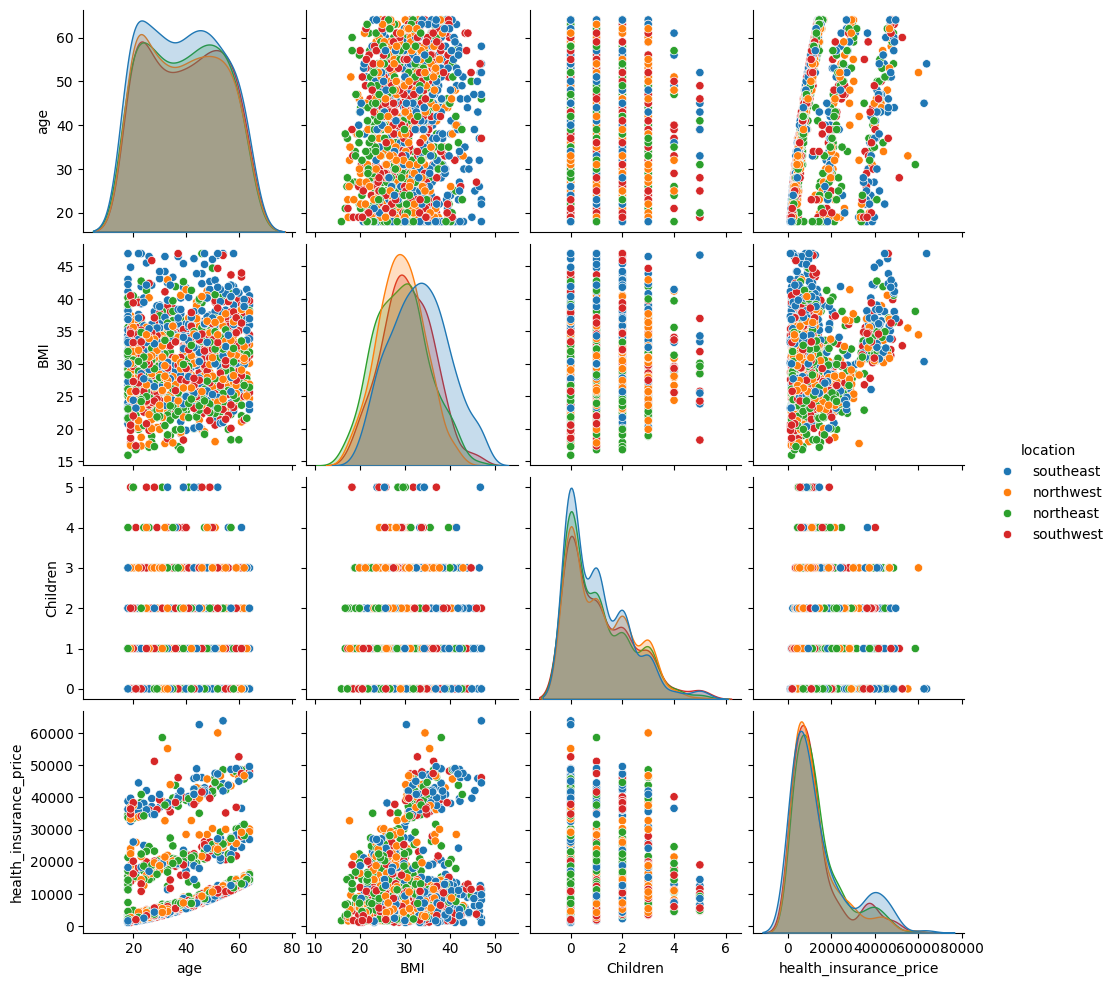

In [ ]:
sns.pairplot(new_df, hue='location')
plt.show()

<h1>Feature Engineering<h1>

<h2>Feature Encoding, Feature Scaling

In [ ]:
#categorical columns that require encoding
new_df.select_dtypes(exclude=np.number).columns

Index(['gender', 'smoking_status', 'location'], dtype='object')

In [ ]:
#all caltegorical columns are oridnal
print('Gender:',new_df['gender'].unique())
print('Smoking_Status:',new_df['smoking_status'].unique())
print('Location:',new_df['location'].unique())

Gender: ['male' 'female']
Smoking_Status: ['no' 'yes']
Location: ['southeast' 'northwest' 'northeast' 'southwest']


In [ ]:
#after encoding all of the columns will require scaling

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#splitting dataset to perform encoding and scaling
X= new_df.drop('health_insurance_price', axis=1)
y= new_df['health_insurance_price']

In [ ]:
#creating transformations using ColumnTransformer
trf1= ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False), ['gender', 'smoking_status', 'location'])
], remainder='passthrough')

trf2= ColumnTransformer([
    ('SS', StandardScaler(),slice(0,11))
])


In [ ]:
#creating pipeline to apply transformations
pipe= Pipeline([
    ('trf1', trf1),
    ('trf2', trf2)
])

In [ ]:
#applying transformation using pipeline on input variable
pipe.fit_transform(X)

array([[-0.98532172,  0.98532172,  0.50607261, ..., -1.50112408,
         0.52346106, -0.07161746],
       [-0.98532172,  0.98532172,  0.50607261, ..., -0.79166642,
         0.39622312,  1.58655265],
       [-0.98532172,  0.98532172,  0.50607261, ..., -0.43693758,
        -1.30496455, -0.90070252],
       ...,
       [ 1.01489694, -1.01489694,  0.50607261, ..., -1.50112408,
         1.03241278, -0.90070252],
       [ 1.01489694, -1.01489694,  0.50607261, ..., -1.28828678,
        -0.79353416, -0.90070252],
       [ 1.01489694, -1.01489694, -1.97600105, ...,  1.54954388,
        -0.25318606, -0.90070252]])

In [ ]:
trf1.get_feature_names_out()

array(['OHE__gender_female', 'OHE__gender_male', 'OHE__smoking_status_no',
       'OHE__smoking_status_yes', 'OHE__location_northeast',
       'OHE__location_northwest', 'OHE__location_southeast',
       'OHE__location_southwest', 'remainder__age', 'remainder__BMI',
       'remainder__Children'], dtype=object)

In [ ]:
#creating X_transformed using transformed values
X_transformed= pd.DataFrame(pipe.fit_transform(X), columns=trf1.get_feature_names_out())

In [ ]:
X_transformed.head()

,OHE__gender_female,OHE__gender_male,OHE__smoking_status_no,OHE__smoking_status_yes,OHE__location_northeast,OHE__location_northwest,OHE__location_southeast,OHE__location_southwest,remainder__age,remainder__BMI,remainder__Children
0,-0.985322,0.985322,0.506073,-0.506073,-0.57106,-0.563869,1.631248,-0.561472,-1.501124,0.523461,-0.071617
1,-0.985322,0.985322,0.506073,-0.506073,-0.57106,-0.563869,1.631248,-0.561472,-0.791666,0.396223,1.586553
2,-0.985322,0.985322,0.506073,-0.506073,-0.57106,1.773460,-0.613028,-0.561472,-0.436938,-1.304965,-0.900703
3,-0.985322,0.985322,0.506073,-0.506073,-0.57106,1.773460,-0.613028,-0.561472,-0.507883,-0.284582,-0.900703
4,1.014897,-1.014897,0.506073,-0.506073,-0.57106,-0.563869,1.631248,-0.561472,-0.578829,-0.803449,-0.900703


In [ ]:
#checking shape
X_transformed.shape

(1285, 11)

<h2>Feature Selection<h2>


<h3>Backward Feature Selection Technique<h3>

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

rfe = RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=8) # taking only 8 features

rfe = rfe.fit(X_transformed, y)

print(X_transformed.columns)
print(rfe.support_)
rfe.ranking_

Index(['OHE__gender_female', 'OHE__gender_male', 'OHE__smoking_status_no',
       'OHE__smoking_status_yes', 'OHE__location_northeast',
       'OHE__location_northwest', 'OHE__location_southeast',
       'OHE__location_southwest', 'remainder__age', 'remainder__BMI',
       'remainder__Children'],
      dtype='object')
[ True False  True False  True  True False  True  True  True  True]


array([1, 3, 1, 4, 1, 1, 2, 1, 1, 1, 1])

In [ ]:
#assigining selected features back to dataframe
X_transformed= X_transformed[['OHE__gender_female','OHE__smoking_status_no','OHE__location_northeast','OHE__location_northwest','OHE__location_southwest','remainder__age', 'remainder__BMI','remainder__Children']]

<h1>Model Training<h1>

In [ ]:
#performing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_transformed, y, test_size=0.2, random_state=42)

<h2>Linear Regression<h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred= lr.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(lr, X_transformed, y, cv=5).mean())

MSE: 38778559.823492594
R2_Score: 0.7540374727694069
Cross_Val_Score: 0.7502879557411608


<h2>SGD Regressor<h2>

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd= SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.01)
sgd.fit(X_train, y_train)

y_pred= sgd.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(sgd, X_transformed, y, cv=5).mean())

MSE: 40662005.962242186
R2_Score: 0.742091253665393
Cross_Val_Score: 0.7361509308103773


<h2>KNN Regressor<h2>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn= KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(knn, X_transformed, y, cv=5).mean())

MSE: 31518639.40298908
R2_Score: 0.8000852987394227
Cross_Val_Score: 0.7991579156495906


<h2>Decision Tree Regressor<h2>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt= DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

y_pred= dt.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(dt, X_transformed, y, cv=5).mean())

MSE: 22864310.37047413
R2_Score: 0.8549775033496855
Cross_Val_Score: 0.8447181588117534


<h2>Random Forest Regressor<h2>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(rf, X_transformed, y, cv=5).mean())

MSE: 25444797.075280447
R2_Score: 0.8386101334863365
Cross_Val_Score: 0.8412866835476956


<h2>Support Vector Regressor<h2>

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr= SVR(kernel='rbf')
svr.fit(X_train, np.log(y_train))
y_pred= svr.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(np.log(y_test), y_pred))
print('Cross_Val_Score:',cross_val_score(svr, X_transformed, np.log(y), cv=5).mean())

MSE: 330615525.9278026
R2_Score: 0.8056221572750675
Cross_Val_Score: 0.8355958421518495


<h2>XGB Regressor<h2>

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb= XGBRegressor(n_estimators=100, max_features=0.9)
xgb.fit(X_train, y_train)
y_pred= xgb.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(xgb, X_transformed, y, cv=5).mean())

MSE: 30368520.470434308
R2_Score: 0.8073802101686901
Cross_Val_Score: 0.8171754934957971


<h2>Ada Boost Regressor<h2>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adb= AdaBoostRegressor(n_estimators=50, learning_rate=0.01)
adb.fit(X_train, y_train)
y_pred= adb.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(adb, X_transformed, y, cv=5).mean())

MSE: 24296602.93736887
R2_Score: 0.8458928364334686
Cross_Val_Score: 0.852765486760622


<h2>Gradient Boost Regressor<h2>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr= GradientBoostingRegressor(n_estimators=50, max_features=0.9)
gbr.fit(X_train, y_train)
y_pred= gbr.predict(X_test)

print('MSE:',mean_squared_error(y_test, y_pred))
print('R2_Score:',r2_score(y_test, y_pred))
print('Cross_Val_Score:',cross_val_score(gbr, X_transformed, y, cv=5).mean())

MSE: 21211059.26754896
R2_Score: 0.8654636539770715
Cross_Val_Score: 0.8648299901909915
